4.	Final Enhancement – If needed, apply sharpening to enhance plant details.

TO avoid the sharpening of uniform areas that contain noise. We used an edge detection filter paired with masking. So now we can only sharpen the areas that contain edges.

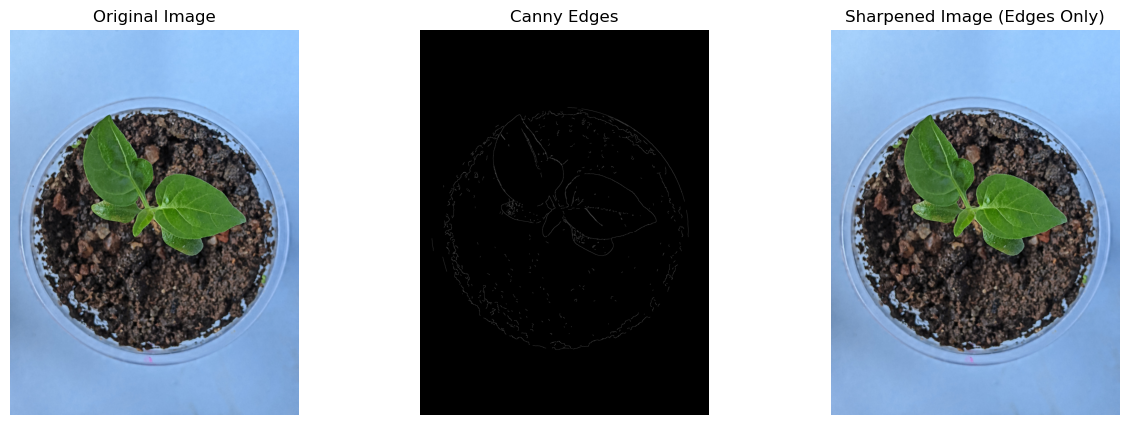

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sharpen_edges(image_path):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Apply Canny edge detection
    edges = cv2.Canny(gray, 100, 200)
    
    # Create a sharpening kernel
    sharpening_kernel = np.array([[0, -1, 0],
                                   [-1, 5, -1],
                                   [0, -1, 0]])
    
    # Apply sharpening only to the areas with edges
    sharpened = cv2.filter2D(image, -1, sharpening_kernel)
    
    # Create a mask from the edges
    edges_mask = cv2.dilate(edges, None)  # Optional: dilate to include surrounding pixels
    edges_mask = cv2.cvtColor(edges_mask, cv2.COLOR_GRAY2RGB)  # Convert mask to 3 channels
    
    # Blend the sharpened image and original image using the edge mask
    final_image = np.where(edges_mask > 0, sharpened, image)
    from cv2 import imwrite
    imwrite('img/6_sharpen image.jpg',cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR))
    
    # Display the results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    ax[0].axis("off")
    
    ax[1].imshow(edges, cmap='gray')
    ax[1].set_title("Canny Edges")
    ax[1].axis("off")
    
    ax[2].imshow(final_image)
    ax[2].set_title("Sharpened Image (Edges Only)")
    ax[2].axis("off")
    
    plt.show()

# Example usage
image_path = "img/5_Remove Gaussian noise_bilateral_filter.jpg"  # Replace with your image path
sharpen_edges(image_path)

Even with edge masking, the sharpening kernel can still amplify noise in areas close to the detected edges. Here's a revised approach that incorporates noise reduction and more controlled sharpening to minimize noise amplification

As a preprocessing step: Performing noise reduction before sharpening can help prevent noise amplification.


Key Improvements:
1.	Noise Reduction Before Edge Detection: 
o	A Gaussian blur is applied to the original image before edge detection. This significantly reduces noise that would otherwise be picked up by the Canny detector and amplified during sharpening.
o	Using the blurred image for edge detection, makes the edge detection more robust to noise.
2.	Sharpening the Blurred Image: 
o	The sharpening kernel is applied to the blurred image, not the original. This further minimizes noise amplification.
3.	Dilated Edge Mask: 
o	The edge mask is dilated with more iterations to ensure that the sharpened effect is applied to a slightly wider area around the edges, reducing artifacts.
4.	Post Sharpening Noise Reduction: 
o	A light Gaussian blur is applied to the final image, to reduce any new noise introduced during the sharpening process.



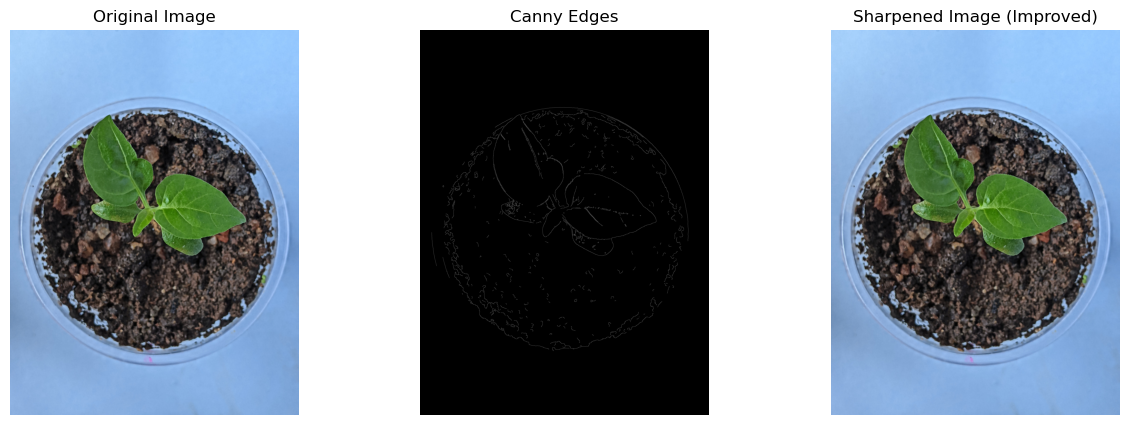

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sharpen_edges_improved(image_path):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Noise Reduction (Gaussian Blur)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)  # Adjust kernel size as needed

    # Convert to grayscale
    gray = cv2.cvtColor(blurred, cv2.COLOR_RGB2GRAY) #use blurred image

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150)  # Adjust thresholds as needed

    # Sharpening kernel
    sharpening_kernel = np.array([[0, -1, 0],
                                 [-1, 5, -1],
                                 [0, -1, 0]])

    # Apply sharpening to the blurred image
    sharpened_blurred = cv2.filter2D(blurred, -1, sharpening_kernel)

    # Create a mask from the edges (dilated)
    edges_mask = cv2.dilate(edges, None, iterations=2) #increase iterations
    edges_mask = cv2.cvtColor(edges_mask, cv2.COLOR_GRAY2RGB)

    # Blend sharpened and original, using the mask.
    final_image = np.where(edges_mask > 0, sharpened_blurred, image)
    #cv2.imwrite('img/sharpened_improved1.jpg', cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR))

    #Light Noise reduction after sharpening.
    final_image = cv2.GaussianBlur(final_image, (3,3), 0)

    cv2.imwrite('img/6_sharpened_improved.jpg', cv2.cvtColor(final_image, cv2.COLOR_RGB2BGR))

    # Display the results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    ax[1].imshow(edges, cmap='gray')
    ax[1].set_title("Canny Edges")
    ax[1].axis("off")

    ax[2].imshow(final_image)
    ax[2].set_title("Sharpened Image (Improved)")
    ax[2].axis("off")

    plt.show()

# Example usage
image_path = "img/5_Remove Gaussian noise_bilateral_filter.jpg"  # Replace with your image path
sharpen_edges_improved(image_path)